In [ ]:
#!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
#!pip install matplotlib


In [ ]:
#!pip install seaborn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Available job descriptions:
1. job_desc_product_manager.pdf
2. job_desc_java_developer.pdf
3. job_desc_full_stack_engineer.pdf
4. job_desc_front_end_engineer.pdf
5. iot.pdf
Enter the index of the job description you want to compare (1 to 5): 1


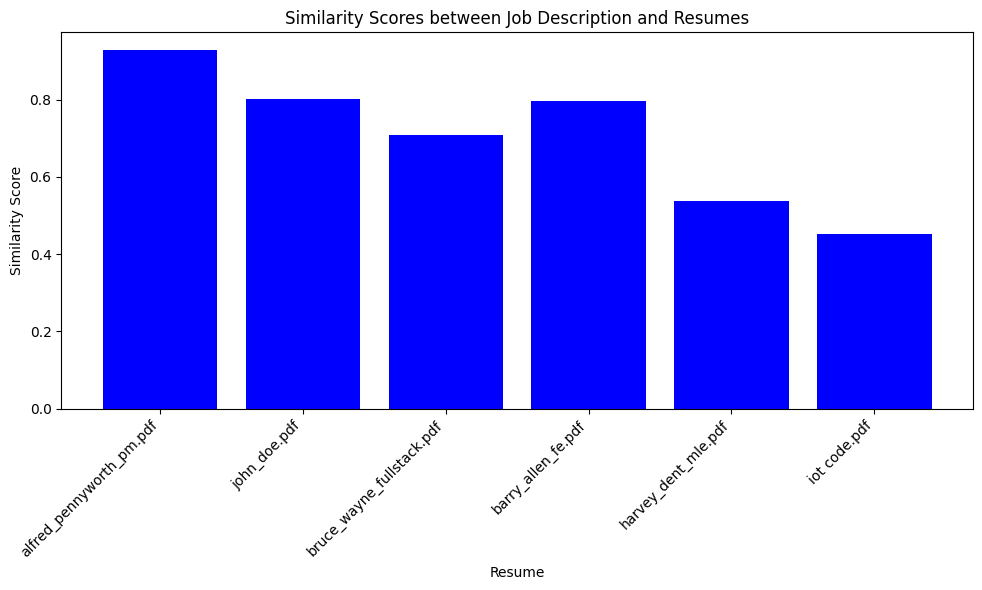

In [ ]:
import os
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import PyPDF2
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('punkt')

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()
    return text

def preprocess_text(text):
    return word_tokenize(text.lower())

def train_doc2vec_model(documents):
    model = Doc2Vec(vector_size=20, min_count=2, epochs=50)
    model.build_vocab(documents)
    model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
    return model

def calculate_similarity(model, text1, text2):
    vector1 = model.infer_vector(preprocess_text(text1))
    vector2 = model.infer_vector(preprocess_text(text2))
    return model.dv.cosine_similarities(vector1, [vector2])[0]

# Folder paths for resumes and job descriptions
resumes_folder = "/content/drive/MyDrive/industry project/Resumes"
job_descriptions_folder = "/content/drive/MyDrive/industry project/JobDescription"

# List all PDF files in the folders
resumes_files = [os.path.join(resumes_folder, file) for file in os.listdir(resumes_folder) if file.endswith(".pdf")]
job_descriptions_files = [os.path.join(job_descriptions_folder, file) for file in os.listdir(job_descriptions_folder) if file.endswith(".pdf")]

# Load job descriptions from the folder
print("Available job descriptions:")
for i, job_desc_file in enumerate(job_descriptions_files):
    print(f"{i + 1}. {os.path.basename(job_desc_file)}")

selected_job_index = int(input("Enter the index of the job description you want to compare (1 to {}): ".format(len(job_descriptions_files))))
selected_job_path = job_descriptions_files[selected_job_index - 1]
selected_job_text = extract_text_from_pdf(selected_job_path)

# Load all resumes from the folder
all_resumes_text = [extract_text_from_pdf(resume_path) for resume_path in resumes_files]

# Preprocess the documents and create TaggedDocuments for resumes
tagged_resumes = [TaggedDocument(words=preprocess_text(text), tags=[str(i)]) for i, text in enumerate(all_resumes_text)]

# Train Doc2Vec model for resumes
model_resumes = train_doc2vec_model(tagged_resumes)

# Create a DataFrame to store the results
results_data = {'Resume': [], 'Similarity Score': []}

# Compare the selected job description with all resumes
for i, resume_text in enumerate(all_resumes_text):
    similarity_score = calculate_similarity(model_resumes, resume_text, selected_job_text)
    results_data['Resume'].append(os.path.basename(resumes_files[i]))
    results_data['Similarity Score'].append(similarity_score)

# Create a DataFrame
results_df = pd.DataFrame(results_data)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(results_df['Resume'], results_df['Similarity Score'], color='blue')
plt.xlabel('Resume')
plt.ylabel('Similarity Score')
plt.title('Similarity Scores between Job Description and Resumes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Available job descriptions:
1. job_desc_product_manager.pdf
2. job_desc_java_developer.pdf
3. job_desc_full_stack_engineer.pdf
4. job_desc_front_end_engineer.pdf
5. iot.pdf
Enter the index of the job description you want to compare (1 to 5): 2


<ipython-input-8-3781abc1c714>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Resume', y='Similarity Score', data=results_df, palette='viridis')


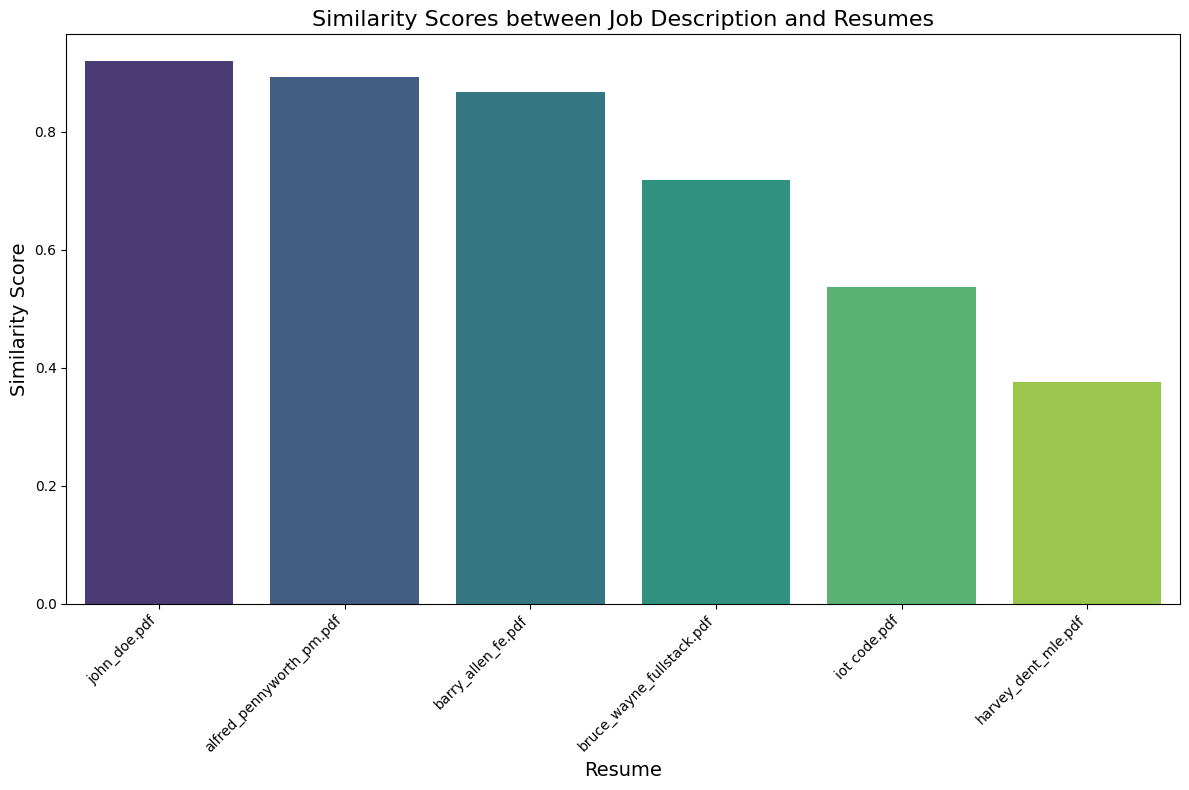


Results Table (sorted by Similarity Score in descending order):
                      Resume  Similarity Score
1               john_doe.pdf          0.918800
0   alfred_pennyworth_pm.pdf          0.892397
3         barry_allen_fe.pdf          0.866223
2  bruce_wayne_fullstack.pdf          0.717232
5               iot code.pdf          0.536767
4        harvey_dent_mle.pdf          0.375760


In [ ]:
import os
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import PyPDF2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()
    return text

def preprocess_text(text):
    return word_tokenize(text.lower())

def train_doc2vec_model(documents):
    model = Doc2Vec(vector_size=20, min_count=2, epochs=50)
    model.build_vocab(documents)
    model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
    return model

def calculate_similarity(model, text1, text2):
    vector1 = model.infer_vector(preprocess_text(text1))
    vector2 = model.infer_vector(preprocess_text(text2))
    return model.dv.cosine_similarities(vector1, [vector2])[0]

# Folder paths for resumes and job descriptions
resumes_folder = "/content/drive/MyDrive/industry project/Resumes"
job_descriptions_folder = "/content/drive/MyDrive/industry project/JobDescription"

# List all PDF files in the folders
resumes_files = [os.path.join(resumes_folder, file) for file in os.listdir(resumes_folder) if file.endswith(".pdf")]
job_descriptions_files = [os.path.join(job_descriptions_folder, file) for file in os.listdir(job_descriptions_folder) if file.endswith(".pdf")]

# Load job descriptions from the folder
print("Available job descriptions:")
for i, job_desc_file in enumerate(job_descriptions_files):
    print(f"{i + 1}. {os.path.basename(job_desc_file)}")

selected_job_index = int(input("Enter the index of the job description you want to compare (1 to {}): ".format(len(job_descriptions_files))))
selected_job_path = job_descriptions_files[selected_job_index - 1]
selected_job_text = extract_text_from_pdf(selected_job_path)

# Load all resumes from the folder
all_resumes_text = [extract_text_from_pdf(resume_path) for resume_path in resumes_files]

# Preprocess the documents and create TaggedDocuments for resumes
tagged_resumes = [TaggedDocument(words=preprocess_text(text), tags=[str(i)]) for i, text in enumerate(all_resumes_text)]

# Train Doc2Vec model for resumes
model_resumes = train_doc2vec_model(tagged_resumes)

# Create a DataFrame to store the results
results_data = {'Resume': [], 'Similarity Score': []}

# Compare the selected job description with all resumes
for i, resume_text in enumerate(all_resumes_text):
    similarity_score = calculate_similarity(model_resumes, resume_text, selected_job_text)
    results_data['Resume'].append(os.path.basename(resumes_files[i]))
    results_data['Similarity Score'].append(similarity_score)

# Create a DataFrame
results_df = pd.DataFrame(results_data)

# Sort the DataFrame by similarity scores in descending order
results_df = results_df.sort_values(by='Similarity Score', ascending=False)

# Plot the results using seaborn for a more attractive visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Resume', y='Similarity Score', data=results_df, palette='viridis')
plt.xlabel('Resume', fontsize=14)
plt.ylabel('Similarity Score', fontsize=14)
plt.title('Similarity Scores between Job Description and Resumes', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the results table
print("\nResults Table (sorted by Similarity Score in descending order):")
print(results_df)


In [ ]:
pip install gensim nltk PyPDF2 pandas seaborn matplotlib networkx


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Available job descriptions:
1. job_desc_product_manager.pdf
2. job_desc_java_developer.pdf
3. job_desc_full_stack_engineer.pdf
4. job_desc_front_end_engineer.pdf
5. iot.pdf
Enter the index of the job description you want to compare (1 to 5): 2


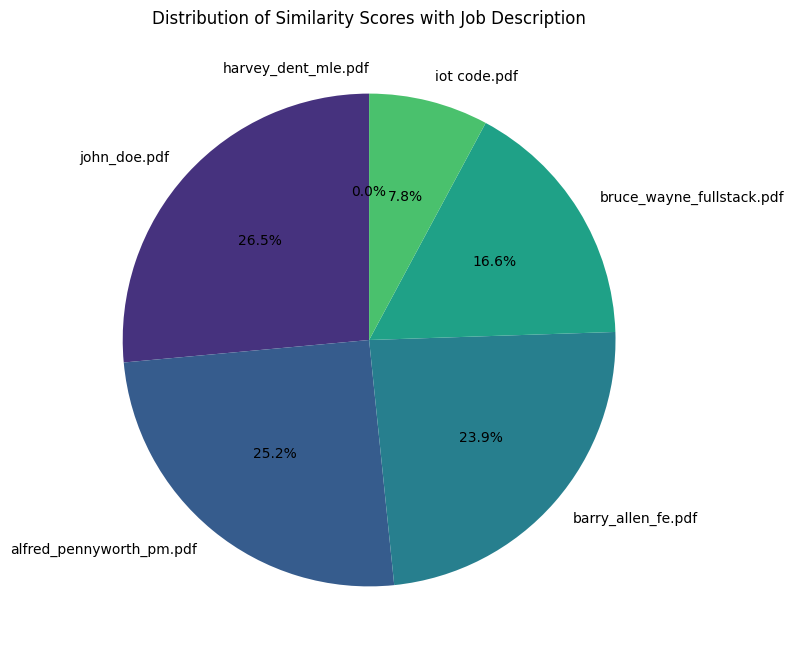

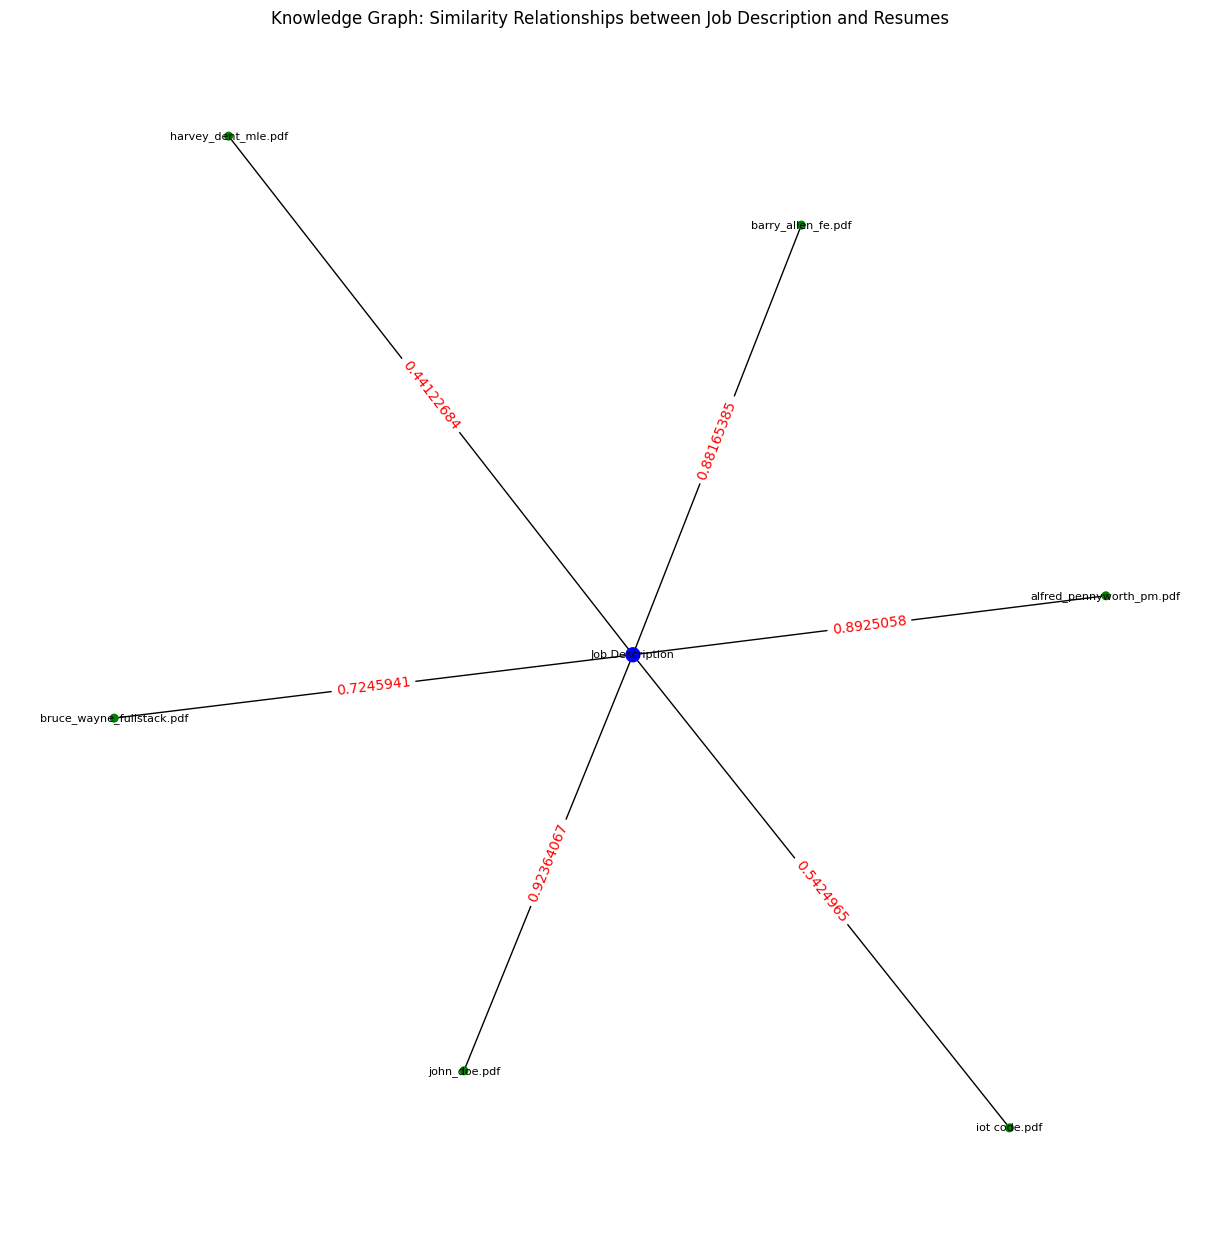


Results Table (sorted by Similarity Score in descending order):
                      Resume  Similarity Score
1               john_doe.pdf          0.918800
0   alfred_pennyworth_pm.pdf          0.892397
3         barry_allen_fe.pdf          0.866223
2  bruce_wayne_fullstack.pdf          0.717232
5               iot code.pdf          0.536767
4        harvey_dent_mle.pdf          0.375760


In [ ]:
import os
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import PyPDF2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

nltk.download('punkt')

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()
    return text

def preprocess_text(text):
    return word_tokenize(text.lower())

def train_doc2vec_model(documents):
    model = Doc2Vec(vector_size=20, min_count=2, epochs=50)
    model.build_vocab(documents)
    model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
    return model

def calculate_similarity(model, text1, text2):
    vector1 = model.infer_vector(preprocess_text(text1))
    vector2 = model.infer_vector(preprocess_text(text2))
    return model.dv.cosine_similarities(vector1, [vector2])[0]

# Folder paths for resumes and job descriptions
resumes_folder = "/content/drive/MyDrive/industry project/Resumes"
job_descriptions_folder = "/content/drive/MyDrive/industry project/JobDescription"

# List all PDF files in the folders
resumes_files = [os.path.join(resumes_folder, file) for file in os.listdir(resumes_folder) if file.endswith(".pdf")]
job_descriptions_files = [os.path.join(job_descriptions_folder, file) for file in os.listdir(job_descriptions_folder) if file.endswith(".pdf")]

# Load job descriptions from the folder
print("Available job descriptions:")
for i, job_desc_file in enumerate(job_descriptions_files):
    print(f"{i + 1}. {os.path.basename(job_desc_file)}")

selected_job_index = int(input("Enter the index of the job description you want to compare (1 to {}): ".format(len(job_descriptions_files))))
selected_job_path = job_descriptions_files[selected_job_index - 1]
selected_job_text = extract_text_from_pdf(selected_job_path)

# Load all resumes from the folder
all_resumes_text = [extract_text_from_pdf(resume_path) for resume_path in resumes_files]

# Preprocess the documents and create TaggedDocuments for resumes
tagged_resumes = [TaggedDocument(words=preprocess_text(text), tags=[str(i)]) for i, text in enumerate(all_resumes_text)]

# Train Doc2Vec model for resumes
model_resumes = train_doc2vec_model(tagged_resumes)

# Create a DataFrame to store the results
results_data = {'Resume': [], 'Similarity Score': []}

# Compare the selected job description with all resumes
for i, resume_text in enumerate(all_resumes_text):
    similarity_score = calculate_similarity(model_resumes, resume_text, selected_job_text)
    results_data['Resume'].append(os.path.basename(resumes_files[i]))
    results_data['Similarity Score'].append(similarity_score)

# Create a DataFrame
results_df = pd.DataFrame(results_data)

# Sort the DataFrame by similarity scores in descending order
results_df = results_df.sort_values(by='Similarity Score', ascending=False)

# Plot a Pie Chart to show the distribution of similarity scores
plt.figure(figsize=(8, 8))

# Normalize similarity scores to be non-negative
normalized_scores = results_df['Similarity Score'] - results_df['Similarity Score'].min()
total_similarity = normalized_scores.sum()

# Check if all similarity scores are zero
if total_similarity == 0:
    # If all scores are zero, assign equal weights
    normalized_scores = 1
else:
    # Normalize scores
    normalized_scores /= total_similarity

plt.pie(normalized_scores, labels=results_df['Resume'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Similarity Scores with Job Description')
plt.show()

# Create a Knowledge Graph using NetworkX
G = nx.Graph()

# Add nodes for job description and resumes
G.add_node('Job Description', color='blue', size=100)
for i, resume_path in enumerate(resumes_files):
    G.add_node(os.path.basename(resume_path), color='green', size=30)

# Add edges with similarity scores as weights
for i, resume_text in enumerate(all_resumes_text):
    similarity_score = calculate_similarity(model_resumes, resume_text, selected_job_text)
    G.add_edge('Job Description', os.path.basename(resumes_files[i]), weight=similarity_score)

# Plot the Knowledge Graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, font_size=8, node_size=[d['size'] for n, d in G.nodes(data=True)], node_color=[d['color'] for n, d in G.nodes(data=True)])
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Knowledge Graph: Similarity Relationships between Job Description and Resumes')
plt.show()

# Display the results table
print("\nResults Table (sorted by Similarity Score in descending order):")
print(results_df)


In [ ]:
import os
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import PyPDF2
import pandas as pd

nltk.download('punkt')

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()
    return text

def preprocess_text(text):
    return word_tokenize(text.lower())

def train_doc2vec_model(documents):
    model = Doc2Vec(vector_size=20, min_count=2, epochs=50)
    model.build_vocab(documents)
    model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
    return model

def calculate_similarity(model, text1, text2):
    vector1 = model.infer_vector(preprocess_text(text1))
    vector2 = model.infer_vector(preprocess_text(text2))
    return model.dv.cosine_similarities(vector1, [vector2])[0]





# Folder paths for resumes and job descriptions
resumes_folder = "/content/drive/MyDrive/industry project/Resumes"
job_descriptions_folder = "/content/drive/MyDrive/industry project/JobDescription"

# List all PDF files in the folders
resumes_files = [os.path.join(resumes_folder, file) for file in os.listdir(resumes_folder) if file.endswith(".pdf")]
job_descriptions_files = [os.path.join(job_descriptions_folder, file) for file in os.listdir(job_descriptions_folder) if file.endswith(".pdf")]

# Load job descriptions from the folder
print("Available job descriptions:")
for i, job_desc_file in enumerate(job_descriptions_files):
    print(f"{i + 1}. {os.path.basename(job_desc_file)}")

selected_job_index = int(input("Enter the index of the job description you want to compare (1 to {}): ".format(len(job_descriptions_files))))
selected_job_path = job_descriptions_files[selected_job_index - 1]
selected_job_text = extract_text_from_pdf(selected_job_path)

# Load all resumes from the folder
all_resumes_text = [extract_text_from_pdf(resume_path) for resume_path in resumes_files]

# Preprocess the documents and create TaggedDocuments for resumes
tagged_resumes = [TaggedDocument(words=preprocess_text(text), tags=[str(i)]) for i, text in enumerate(all_resumes_text)]

# Train Doc2Vec model for resumes
model_resumes = train_doc2vec_model(tagged_resumes)

# Create a DataFrame to store the results
results_data = {'Resume': [], 'Similarity Score': []}

# Compare the selected job description with all resumes
for i, resume_text in enumerate(all_resumes_text):
    similarity_score = calculate_similarity(model_resumes, resume_text, selected_job_text)
    results_data['Resume'].append(os.path.basename(resumes_files[i]))
    results_data['Similarity Score'].append(similarity_score)




# Create a DataFrame and display the results
results_df = pd.DataFrame(results_data)
print(results_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Available job descriptions:
1. job_desc_product_manager.pdf
2. job_desc_java_developer.pdf
3. job_desc_full_stack_engineer.pdf
4. job_desc_front_end_engineer.pdf
5. iot.pdf
Enter the index of the job description you want to compare (1 to 5): 3
                      Resume  Similarity Score
0   alfred_pennyworth_pm.pdf          0.892363
1               john_doe.pdf          0.865436
2  bruce_wayne_fullstack.pdf          0.796693
3         barry_allen_fe.pdf          0.898039
4        harvey_dent_mle.pdf          0.552645
5               iot code.pdf          0.471122


In [ ]:
import os
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import PyPDF2
import pandas as pd
import re  # Added import for regular expressions
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()
    return text

def preprocess_text(text):
    return word_tokenize(text.lower())

def train_doc2vec_model(documents):
    model = Doc2Vec(vector_size=20, min_count=2, epochs=50)
    model.build_vocab(documents)
    model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
    return model

def calculate_similarity(model, text1, text2):
    vector1 = model.infer_vector(preprocess_text(text1))
    vector2 = model.infer_vector(preprocess_text(text2))
    return model.dv.cosine_similarities(vector1, [vector2])[0]

# Folder paths for resumes and job descriptions
resumes_folder = "/content/drive/MyDrive/industry project/Resumes"
job_descriptions_folder = "/content/drive/MyDrive/industry project/JobDescription"

# List all PDF files in the folders
resumes_files = [os.path.join(resumes_folder, file) for file in os.listdir(resumes_folder) if file.endswith(".pdf")]
job_descriptions_files = [os.path.join(job_descriptions_folder, file) for file in os.listdir(job_descriptions_folder) if file.endswith(".pdf")]

# Load job descriptions from the folder
print("Available job descriptions:")
for i, job_desc_file in enumerate(job_descriptions_files):
    print(f"{i + 1}. {os.path.basename(job_desc_file)}")

selected_job_index = int(input("Enter the index of the job description you want to compare (1 to {}): ".format(len(job_descriptions_files))))
selected_job_path = job_descriptions_files[selected_job_index - 1]
selected_job_text = extract_text_from_pdf(selected_job_path)

# Load all resumes from the folder
all_resumes_text = [extract_text_from_pdf(resume_path) for resume_path in resumes_files]

# Preprocess the documents and create TaggedDocuments for resumes
tagged_resumes = [TaggedDocument(words=preprocess_text(text), tags=[str(i)]) for i, text in enumerate(all_resumes_text)]

# Train Doc2Vec model for resumes
model_resumes = train_doc2vec_model(tagged_resumes)

# Create a DataFrame to store the results
results_data = {'Resume': [], 'Similarity Score': []}

# Compare the selected job description with all resumes
for i, resume_text in enumerate(all_resumes_text):
    similarity_score = calculate_similarity(model_resumes, resume_text, selected_job_text)
    results_data['Resume'].append(os.path.basename(resumes_files[i]))
    results_data['Similarity Score'].append(similarity_score)

# Create a DataFrame
results_df = pd.DataFrame(results_data)

# Find the index of the highest similarity score
highest_score_index = results_df['Similarity Score'].idxmax()

# Get the filename and full path of the resume with the highest score
highest_score_resume = resumes_files[highest_score_index]
highest_score_resume_text = all_resumes_text[highest_score_index]

# Extract name, email addresses, and contact numbers using regular expressions
name_pattern = r'\b[A-Z][a-z]+ [A-Z][a-z]+\b'
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
phone_pattern = r'\b\d{10}\b|\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b'

names = re.findall(name_pattern, highest_score_resume_text)
emails = re.findall(email_pattern, highest_score_resume_text)
contacts = re.findall(phone_pattern, highest_score_resume_text)

# Combine extracted information into a single string for TF-IDF analysis
combined_text = ' '.join([highest_score_resume_text] + names + emails + contacts)

# Use TF-IDF to get high-weighted keywords
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([combined_text])

# Get feature names (words) and their corresponding TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

# Create a DataFrame to store keywords and their TF-IDF scores
keywords_df = pd.DataFrame({'Keyword': feature_names, 'TF-IDF Score': tfidf_scores})

# Sort DataFrame by TF-IDF scores in descending order
keywords_df = keywords_df.sort_values(by='TF-IDF Score', ascending=False)

# Display the results
print("\nResume with the Highest Similarity Score:")
print("Filename:", os.path.basename(highest_score_resume))
print("Similarity Score:", results_df.loc[highest_score_index, 'Similarity Score'])
print("Extracted Name:", names)
print("Extracted Email Addresses:", emails)
print("Extracted Contact Numbers:", contacts)

# Display high-weighted keywords
print("\nHigh-Weighted Keywords:")
print(keywords_df.head(10))  # Displaying the top 10 keywords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Available job descriptions:
1. job_desc_product_manager.pdf
2. job_desc_java_developer.pdf
3. job_desc_full_stack_engineer.pdf
4. job_desc_front_end_engineer.pdf
5. iot.pdf
Enter the index of the job description you want to compare (1 to 5): 1

Resume with the Highest Similarity Score:
Filename: alfred_pennyworth_pm.pdf
Similarity Score: 0.92794013
Extracted Name: ['Alfred Pennyworth', 'Professional Summary', 'Seasoned Product', 'User Experience', 'Market Research', 'Data Analysis', 'Mountain View', 'Software Development', 'Software Development', 'Software Development', 'Los Gatos', 'Software Development', 'Menlo Park', 'Business Administration', 'Stanford University', 'Computer Science', 'Massachusetts Institute', 'Computer Science', 'Home Automation', 'Raspberry Pi']
Extracted Email Addresses: ['pealfred.pennyworth@email.com']
Extracted Contact Numbers: []

High-Weighted Keywords:
         Keyword  TF-IDF Score
62   development      0.326338
153     software      0.326338
171        


Skills and their Frequencies:
python: 5 times
java: 5 times
communication: 3 times
machine learning: 2 times
data analysis: 1 times


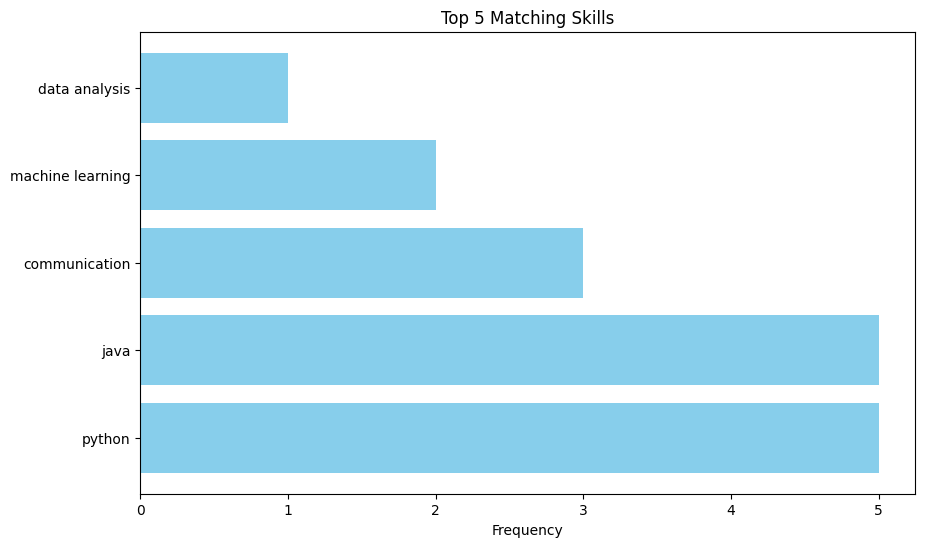

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to extract skills from text
def extract_skills(text):
    # Add more keywords relevant to skills
    skills_keywords = ["python", "java", "machine learning", "data analysis", "communication", "problem solving"]

    # Extract skills from the text
    skills = [skill.lower() for skill in skills_keywords if skill.lower() in text.lower()]

    return skills

# Extract skills from job description and all resumes
job_description_skills = extract_skills(selected_job_text)
resume_skills_list = [extract_skills(resume_text) for resume_text in all_resumes_text]

# Calculate the frequency of each skill in resumes
skills_frequency = {}
for resume_skills in resume_skills_list:
    for skill in resume_skills:
        skills_frequency[skill] = skills_frequency.get(skill, 0) + 1

# Sort skills by frequency in descending order
sorted_skills = sorted(skills_frequency.items(), key=lambda x: x[1], reverse=True)

# Display skills and their frequencies
print("\nSkills and their Frequencies:")
for skill, frequency in sorted_skills:
    print(f"{skill}: {frequency} times")

# Create a bar chart to visualize matching skills
plt.figure(figsize=(10, 6))
skills, frequencies = zip(*sorted_skills)
plt.barh(skills[:10], frequencies[:10], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 5 Matching Skills')
plt.show()



Skills and their Frequencies in the Highest Matching Resume:
python: 1 times
java: 1 times
data analysis: 1 times
communication: 1 times


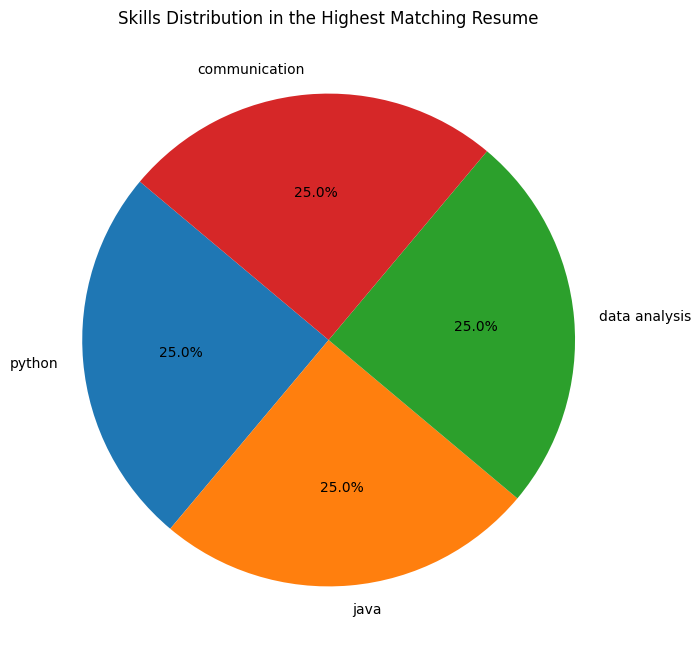

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to extract skills from text
def extract_skills(text):
    # Add more keywords relevant to skills
    skills_keywords = ["python", "java", "machine learning", "data analysis", "communication", "problem solving"]

    # Extract skills from the text
    skills = [skill.lower() for skill in skills_keywords if skill.lower() in text.lower()]

    return skills

# Extract skills from job description and all resumes
job_description_skills = extract_skills(selected_job_text)
resume_skills_list = [extract_skills(resume_text) for resume_text in all_resumes_text]

# Calculate the similarity scores for all resumes
similarity_scores = [calculate_similarity(model_resumes, resume_text, selected_job_text) for resume_text in all_resumes_text]

# Find the index of the highest similarity score
highest_score_index = results_df['Similarity Score'].idxmax()

# Get the skills of the resume with the highest similarity score
highest_score_resume_skills = resume_skills_list[highest_score_index]

# Calculate the frequency of each skill in the highest matching resume
highest_score_skills_frequency = {}
for skill in highest_score_resume_skills:
    highest_score_skills_frequency[skill] = highest_score_skills_frequency.get(skill, 0) + 1

# Display skills and their frequencies in the highest matching resume
print("\nSkills and their Frequencies in the Highest Matching Resume:")
for skill, frequency in highest_score_skills_frequency.items():
    print(f"{skill}: {frequency} times")

# Create a pie chart to visualize skills in the highest matching resume
plt.figure(figsize=(8, 8))
plt.pie(highest_score_skills_frequency.values(), labels=highest_score_skills_frequency.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Skills Distribution in the Highest Matching Resume')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Available job descriptions:
1. job_desc_product_manager.pdf
2. job_desc_java_developer.pdf
3. job_desc_full_stack_engineer.pdf
4. job_desc_front_end_engineer.pdf
5. iot.pdf
Enter the index of the job description you want to compare (1 to 5): 5

Resume with the Highest Similarity Score:
Filename: iot code.pdf
Similarity Score: 0.99610496
Extracted Name: ['Professional Experience', 'Tech Solutions', 'San Francisco', 'Software Dev', 'Software Solutions', 'Computer Sci', 'Programming Languages', 'Google Cloud', 'Cloud Computing', 'Data Analytics', 'Apache Kafka', 'Smart Home', 'Automation System', 'Professional Memberships', 'Electronics Engineers']
Extracted Email Addresses: []
Extracted Contact Numbers: []

High-Weighted Keywords:
          Keyword  TF-IDF Score
100           iot      0.488306
158     solutions      0.279032
25          cloud      0.244153
157      software      0.209274
16     automation      0.139516
84           home      0.139516
126  professional      0.139516
46   

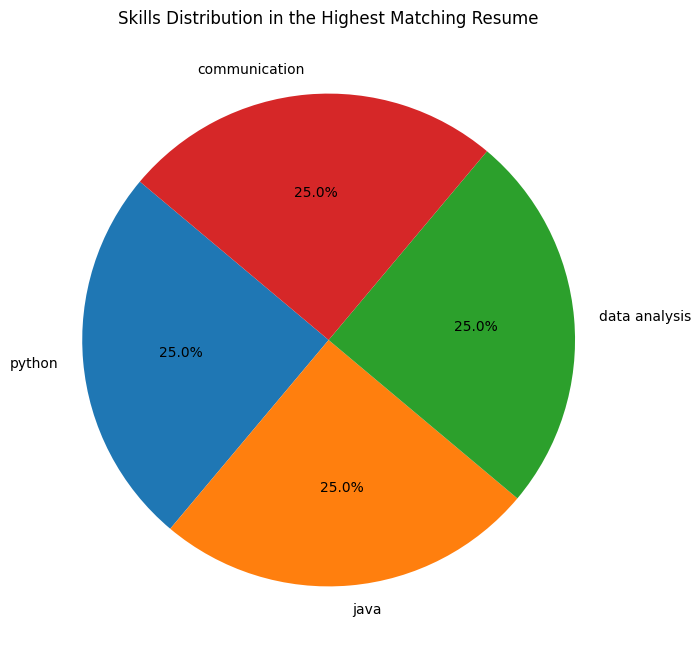

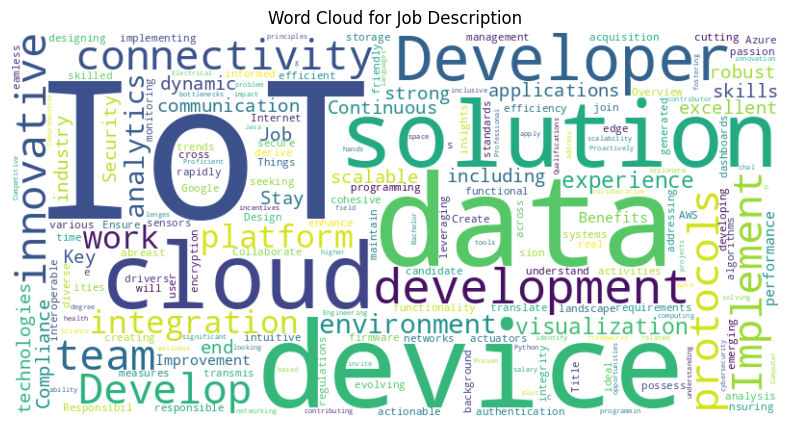

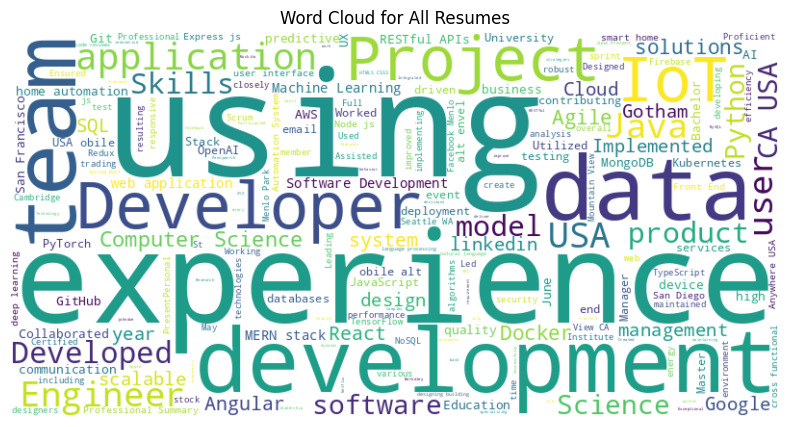

In [ ]:
import matplotlib.pyplot as plt
import PyPDF2
import os
import nltk
import re
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

nltk.download('punkt')

# Function to extract text from a PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()
    return text

# Function to preprocess text
def preprocess_text(text):
    return word_tokenize(text.lower())

# Function to train Doc2Vec model
def train_doc2vec_model(documents):
    model = Doc2Vec(vector_size=20, min_count=2, epochs=50)
    model.build_vocab(documents)
    model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
    return model

# Function to calculate similarity
def calculate_similarity(model, text1, text2):
    vector1 = model.infer_vector(preprocess_text(text1))
    vector2 = model.infer_vector(preprocess_text(text2))
    return model.dv.cosine_similarities(vector1, [vector2])[0]

# Function to extract skills from text
def extract_skills(text):
    skills_keywords = ["python", "java", "machine learning", "data analysis", "communication", "problem solving"]
    skills = [skill.lower() for skill in skills_keywords if skill.lower() in text.lower()]
    return skills

# Folder paths for resumes and job descriptions
resumes_folder = "/content/drive/MyDrive/industry project/Resumes"
job_descriptions_folder = "/content/drive/MyDrive/industry project/JobDescription"

# List all PDF files in the folders
resumes_files = [os.path.join(resumes_folder, file) for file in os.listdir(resumes_folder) if file.endswith(".pdf")]
job_descriptions_files = [os.path.join(job_descriptions_folder, file) for file in os.listdir(job_descriptions_folder) if file.endswith(".pdf")]

# Load job descriptions from the folder
print("Available job descriptions:")
for i, job_desc_file in enumerate(job_descriptions_files):
    print(f"{i + 1}. {os.path.basename(job_desc_file)}")

selected_job_index = int(input("Enter the index of the job description you want to compare (1 to {}): ".format(len(job_descriptions_files))))
selected_job_path = job_descriptions_files[selected_job_index - 1]
selected_job_text = extract_text_from_pdf(selected_job_path)

# Load all resumes from the folder
all_resumes_text = [extract_text_from_pdf(resume_path) for resume_path in resumes_files]

# Preprocess the documents and create TaggedDocuments for resumes
tagged_resumes = [TaggedDocument(words=preprocess_text(text), tags=[str(i)]) for i, text in enumerate(all_resumes_text)]

# Train Doc2Vec model for resumes
model_resumes = train_doc2vec_model(tagged_resumes)

# Create a DataFrame to store the results
results_data = {'Resume': [], 'Similarity Score': []}

# Compare the selected job description with all resumes
for i, resume_text in enumerate(all_resumes_text):
    similarity_score = calculate_similarity(model_resumes, resume_text, selected_job_text)
    results_data['Resume'].append(os.path.basename(resumes_files[i]))
    results_data['Similarity Score'].append(similarity_score)

# Create a DataFrame
results_df = pd.DataFrame(results_data)

# Find the index of the highest similarity score
highest_score_index = results_df['Similarity Score'].idxmax()

# Get the filename and full path of the resume with the highest score
highest_score_resume = resumes_files[highest_score_index]
highest_score_resume_text = all_resumes_text[highest_score_index]

# Extract name, email addresses, and contact numbers using regular expressions
name_pattern = r'\b[A-Z][a-z]+ [A-Z][a-z]+\b'
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
phone_pattern = r'\b\d{10}\b|\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b'

names = re.findall(name_pattern, highest_score_resume_text)
emails = re.findall(email_pattern, highest_score_resume_text)
contacts = re.findall(phone_pattern, highest_score_resume_text)

# Combine extracted information into a single string for TF-IDF analysis
combined_text = ' '.join([highest_score_resume_text] + names + emails + contacts)

# Use TF-IDF to get high-weighted keywords
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([combined_text])

# Get feature names (words) and their corresponding TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

# Create a DataFrame to store keywords and their TF-IDF scores
keywords_df = pd.DataFrame({'Keyword': feature_names, 'TF-IDF Score': tfidf_scores})

# Sort DataFrame by TF-IDF scores in descending order
keywords_df = keywords_df.sort_values(by='TF-IDF Score', ascending=False)

# Display the results
print("\nResume with the Highest Similarity Score:")
print("Filename:", os.path.basename(highest_score_resume))
print("Similarity Score:", results_df.loc[highest_score_index, 'Similarity Score'])
print("Extracted Name:", names)
print("Extracted Email Addresses:", emails)
print("Extracted Contact Numbers:", contacts)

# Display high-weighted keywords
print("\nHigh-Weighted Keywords:")
print(keywords_df.head(10))  # Displaying the top 10 keywords

# Display the distribution of skills in the highest matching resume
print("\nSkills Distribution in the Highest Matching Resume:")
plt.figure(figsize=(8, 8))
plt.pie(highest_score_skills_frequency.values(), labels=highest_score_skills_frequency.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Skills Distribution in the Highest Matching Resume')
plt.show()

# Display a word cloud for job descriptions and resumes
from wordcloud import WordCloud

def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_word_cloud(selected_job_text, 'Word Cloud for Job Description')

all_resumes_text_combined = ' '.join(all_resumes_text)
generate_word_cloud(all_resumes_text_combined, 'Word Cloud for All Resumes')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Available job descriptions:
1. job_desc_product_manager.pdf
2. job_desc_java_developer.pdf
3. job_desc_full_stack_engineer.pdf
4. job_desc_front_end_engineer.pdf
5. iot.pdf
Enter the index of the job description you want to compare (1 to 5): 2

Resume with the Highest Similarity Score:
Filename: john_doe.pdf
Similarity Score: 0.9187995
Extracted Name: ['Main St', 'Full Stack', 'Spring Boot', 'Spring Boot', 'Full Stack', 'Java Developer', 'Used Angular', 'Software Developer', 'Utilized Git', 'Computer Science', 'State University', 'Oracle Certified', 'Certified Angular']
Extracted Email Addresses: ['john.doe@email.com']
Extracted Contact Numbers: []

High-Weighted Keywords:
          Keyword  TF-IDF Score
72           java      0.306561
11        angular      0.306561
123        spring      0.229920
43      developer      0.229920
120      software      0.191600
18           boot      0.191600
14   applications      0.153280
60         github      0.153280
25            com      0.15328

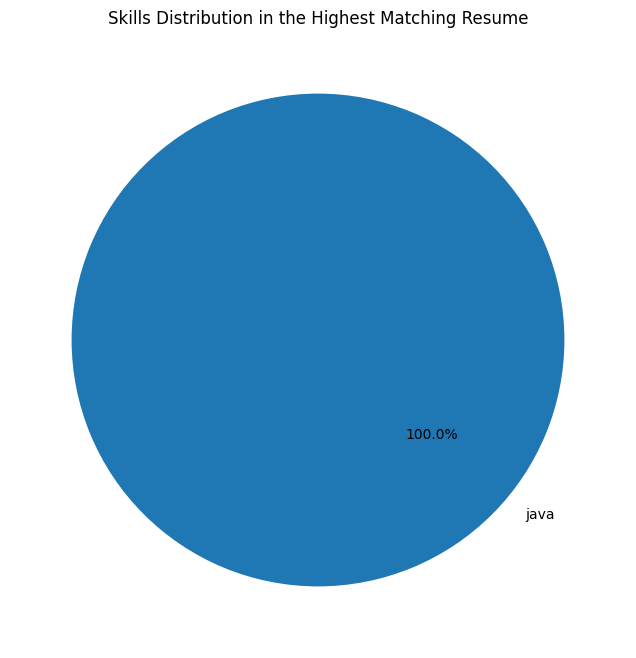

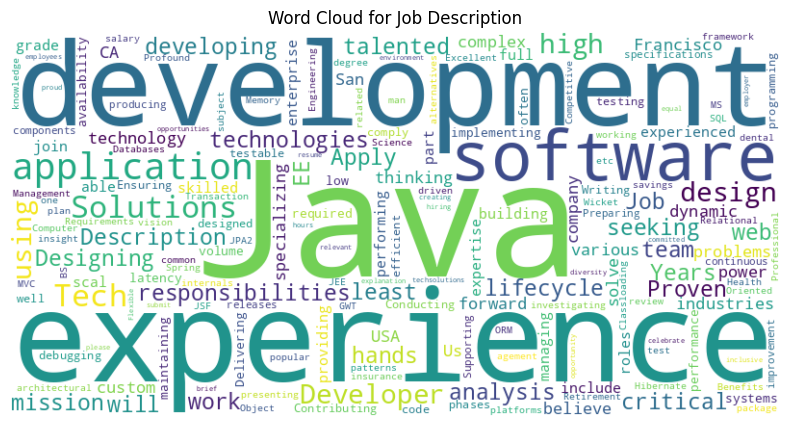

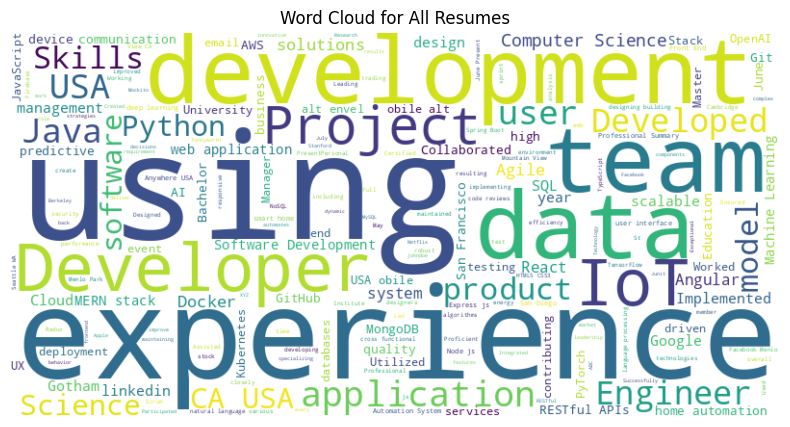


Skills and their Frequencies for All Resumes:
python: 5 times
java: 5 times
communication: 3 times
machine learning: 2 times
data analysis: 1 times


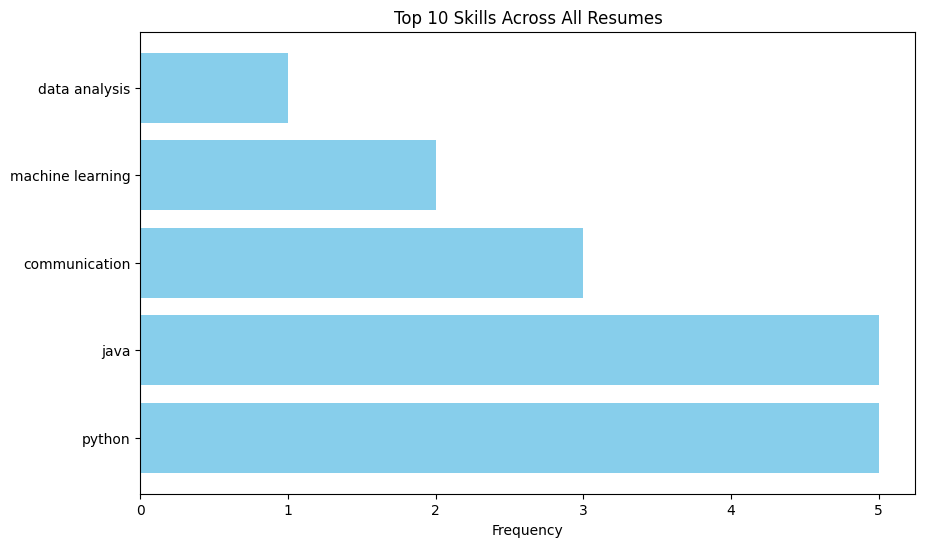

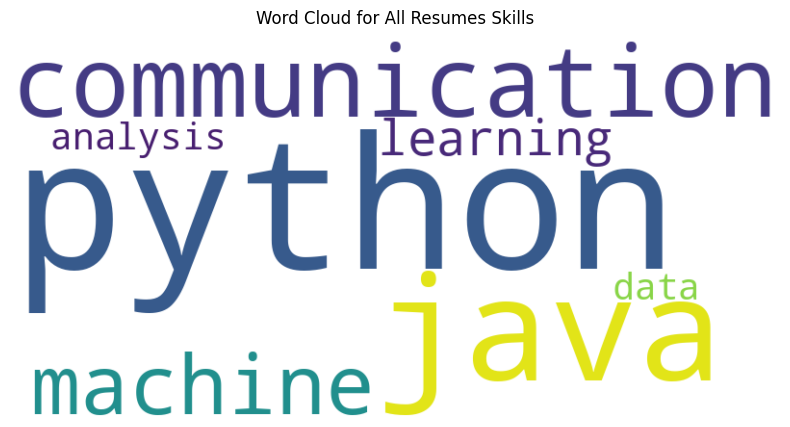

In [ ]:
import matplotlib.pyplot as plt
import PyPDF2
import os
import nltk
import re
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud

nltk.download('punkt')

# Function to extract text from a PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()
    return text

# Function to preprocess text
def preprocess_text(text):
    return word_tokenize(text.lower())

# Function to train Doc2Vec model
def train_doc2vec_model(documents):
    model = Doc2Vec(vector_size=20, min_count=2, epochs=50)
    model.build_vocab(documents)
    model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
    return model

# Function to calculate similarity
def calculate_similarity(model, text1, text2):
    vector1 = model.infer_vector(preprocess_text(text1))
    vector2 = model.infer_vector(preprocess_text(text2))
    return model.dv.cosine_similarities(vector1, [vector2])[0]

# Function to extract skills from text
def extract_skills(text):
    skills_keywords = ["python", "java", "machine learning", "data analysis", "communication", "problem solving"]
    skills = [skill.lower() for skill in skills_keywords if skill.lower() in text.lower()]
    return skills

# Folder paths for resumes and job descriptions
resumes_folder = "/content/drive/MyDrive/industry project/Resumes"
job_descriptions_folder = "/content/drive/MyDrive/industry project/JobDescription"

# List all PDF files in the folders
resumes_files = [os.path.join(resumes_folder, file) for file in os.listdir(resumes_folder) if file.endswith(".pdf")]
job_descriptions_files = [os.path.join(job_descriptions_folder, file) for file in os.listdir(job_descriptions_folder) if file.endswith(".pdf")]

# Load job descriptions from the folder
print("Available job descriptions:")
for i, job_desc_file in enumerate(job_descriptions_files):
    print(f"{i + 1}. {os.path.basename(job_desc_file)}")

selected_job_index = int(input("Enter the index of the job description you want to compare (1 to {}): ".format(len(job_descriptions_files))))
selected_job_path = job_descriptions_files[selected_job_index - 1]
selected_job_text = extract_text_from_pdf(selected_job_path)

# Load all resumes from the folder
all_resumes_text = [extract_text_from_pdf(resume_path) for resume_path in resumes_files]

# Preprocess the documents and create TaggedDocuments for resumes
tagged_resumes = [TaggedDocument(words=preprocess_text(text), tags=[str(i)]) for i, text in enumerate(all_resumes_text)]

# Train Doc2Vec model for resumes
model_resumes = train_doc2vec_model(tagged_resumes)

# Create a DataFrame to store the results
results_data = {'Resume': [], 'Similarity Score': []}

# Compare the selected job description with all resumes
for i, resume_text in enumerate(all_resumes_text):
    similarity_score = calculate_similarity(model_resumes, resume_text, selected_job_text)
    results_data['Resume'].append(os.path.basename(resumes_files[i]))
    results_data['Similarity Score'].append(similarity_score)

# Create a DataFrame
results_df = pd.DataFrame(results_data)

# Find the index of the highest similarity score
highest_score_index = results_df['Similarity Score'].idxmax()

# Get the filename and full path of the resume with the highest score
highest_score_resume = resumes_files[highest_score_index]
highest_score_resume_text = all_resumes_text[highest_score_index]

# Extract name, email addresses, and contact numbers using regular expressions
name_pattern = r'\b[A-Z][a-z]+ [A-Z][a-z]+\b'
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
phone_pattern = r'\b\d{10}\b|\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b'

names = re.findall(name_pattern, highest_score_resume_text)
emails = re.findall(email_pattern, highest_score_resume_text)
contacts = re.findall(phone_pattern, highest_score_resume_text)

# Combine extracted information into a single string for TF-IDF analysis
combined_text = ' '.join([highest_score_resume_text] + names + emails + contacts)

# Use TF-IDF to get high-weighted keywords
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([combined_text])

# Get feature names (words) and their corresponding TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

# Create a DataFrame to store keywords and their TF-IDF scores
keywords_df = pd.DataFrame({'Keyword': feature_names, 'TF-IDF Score': tfidf_scores})

# Sort DataFrame by TF-IDF scores in descending order
keywords_df = keywords_df.sort_values(by='TF-IDF Score', ascending=False)

# Display the results
print("\nResume with the Highest Similarity Score:")
print("Filename:", os.path.basename(highest_score_resume))
print("Similarity Score:", results_df.loc[highest_score_index, 'Similarity Score'])
print("Extracted Name:", names)
print("Extracted Email Addresses:", emails)
print("Extracted Contact Numbers:", contacts)

# Display high-weighted keywords
print("\nHigh-Weighted Keywords:")
print(keywords_df.head(10))  # Displaying the top 10 keywords

# Display the distribution of skills in the highest matching resume
highest_score_resume_skills = extract_skills(highest_score_resume_text)
highest_score_skills_frequency = {skill: highest_score_resume_skills.count(skill) for skill in set(highest_score_resume_skills)}

print("\nSkills Distribution in the Highest Matching Resume:")
plt.figure(figsize=(8, 8))
plt.pie(highest_score_skills_frequency.values(), labels=highest_score_skills_frequency.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Skills Distribution in the Highest Matching Resume')
plt.show()

# Display a word cloud for job descriptions and resumes
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_word_cloud(selected_job_text, 'Word Cloud for Job Description')

all_resumes_text_combined = ' '.join(all_resumes_text)
generate_word_cloud(all_resumes_text_combined, 'Word Cloud for All Resumes')

# Display the distribution of skills for all resumes
all_resumes_skills = [extract_skills(resume_text) for resume_text in all_resumes_text]

# Calculate the frequency of each skill in all resumes
all_skills_frequency = {}
for resume_skills in all_resumes_skills:
    for skill in resume_skills:
        all_skills_frequency[skill] = all_skills_frequency.get(skill, 0) + 1

# Sort skills by frequency in descending order
sorted_all_skills = sorted(all_skills_frequency.items(), key=lambda x: x[1], reverse=True)

# Display skills and their frequencies for all resumes
print("\nSkills and their Frequencies for All Resumes:")
for skill, frequency in sorted_all_skills:
    print(f"{skill}: {frequency} times")

# Create a bar chart to visualize top skills for all resumes
plt.figure(figsize=(10, 6))
all_skills, all_frequencies = zip(*sorted_all_skills)
plt.barh(all_skills[:10], all_frequencies[:10], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Skills Across All Resumes')
plt.show()

# Display a word cloud for skills in all resumes
all_resumes_skills_combined = ' '.join([' '.join(resume_skills) for resume_skills in all_resumes_skills])
generate_word_cloud(all_resumes_skills_combined, 'Word Cloud for All Resumes Skills')
